<div style="text-align: center; font-size: 16px;">
    <strong>Course:</strong> Machine Learning Operations |
    <strong>Lecturer:</strong> Prof. Dr. Klotz |
    <strong>Date:</strong> 17.05.2025 |
    <strong>Name:</strong> Sofie Pischl
</div>

# <center> Data Eploration </center>

In [46]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from pathlib import Path

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SofiePischl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
BASE_DIR = Path().resolve().parent
RAW_DIR = (BASE_DIR / "./data/processed").resolve()

# Datei laden
df = pd.read_csv(RAW_DIR / "social_media_data.csv")

display(df.head())
df.info()

,source,id,title,text,username,likes,comments,shares,plays,timestamp,published_at,url,datetime,date,title_language,title_clean,title_char_count,title_word_count,title_uppercase_count,title_exclamation_count,title_question_count,title_emoji_count,title_mention_count,title_hashtag_count,title_avg_word_length,title_sentiment,title_sentiment_score,text_language,text_clean,text_char_count,text_word_count,text_uppercase_count,text_exclamation_count,text_question_count,text_emoji_count,text_mention_count,text_hashtag_count,text_avg_word_length,text_sentiment,text_sentiment_score,engagement_rate,hour,weekday,year,month,day_period,is_weekend
0,tiktok,7493469801654881542,NaN,#vairalvideo_foryoupage #🇦🇫ازبک_تاجک_پشتون_تر...,afgcap.cut,0.000407,0.000566,0.000096,0.001126,2025-04-15 09:30:06+00:00,NaN,https://v16-webapp-prime.tiktok.com/video/tos/...,2025-04-15 09:30:06+00:00,2025-04-15,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,unknown,#vairalvideo_foryoupage #🇦🇫ازبک_تاجک_پشتون_تر...,52.0,2.0,0.0,0.0,0.0,4.0,0.0,2.0,25.000000,neutral,0.00,0.116029,NaN,NaN,NaN,NaN,NaN,False
1,tiktok,7489427780397010198,NaN,#imapoliceofficer #tensheet #foryou #viral #fy...,backwheelbandit69,0.110825,0.024776,0.064638,0.129241,2025-04-04 12:04:57+00:00,NaN,https://v16-webapp-prime.tiktok.com/video/tos/...,2025-04-04 12:04:57+00:00,2025-04-04,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,unknown,#imapoliceofficer #tensheet #foryou #viral #fy...,68.0,6.0,0.0,0.0,0.0,6.0,0.0,6.0,10.500000,neutral,0.00,0.273845,NaN,NaN,NaN,NaN,NaN,False
2,tiktok,7492000423641959685,NaN,#CapCut #قوالب_كاب_كات_جاهزه_للتصميم__🌴♥ #كاب_...,noordeen_cap_cat_0_1,0.001505,0.000989,0.000335,0.004010,2025-04-11 10:28:10+00:00,NaN,https://v16-webapp-prime.tiktok.com/video/tos/...,2025-04-11 10:28:10+00:00,2025-04-11,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,unknown,#CapCut #قوالب_كاب_كات_جاهزه_للتصميم__🌴♥ #كاب_...,64.0,3.0,2.0,0.0,0.0,8.0,0.0,3.0,20.666667,neutral,0.00,0.119509,NaN,NaN,NaN,NaN,NaN,False
3,tiktok,7472584144510373125,NaN,i think it was a bad idea,maligoshik,0.463918,0.052621,0.276596,0.520049,2025-02-18 02:43:04+00:00,NaN,https://v16-webapp-prime.tiktok.com/video/tos/...,2025-02-18 02:43:04+00:00,2025-02-18,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,en,i think it was a bad idea,25.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.714286,negative,-0.70,0.284582,NaN,NaN,NaN,NaN,NaN,False
4,tiktok,7461927005689302280,NaN,welcome to the thanos world!! #squidgame #squi...,team_thanos_player230,0.006737,0.028503,0.002027,0.038248,2025-01-20 09:27:52+00:00,NaN,https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...,2025-01-20 09:27:52+00:00,2025-01-20,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,en,welcome to the thanos world!! #squidgame #squi...,229.0,25.0,0.0,2.0,0.0,22.0,0.0,20.0,8.200000,positive,0.75,0.057531,NaN,NaN,NaN,NaN,NaN,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   1691 non-null   object 
 1   id                       1691 non-null   object 
 2   title                    638 non-null    object 
 3   text                     1690 non-null   object 
 4   username                 1363 non-null   object 
 5   likes                    1691 non-null   float64
 6   comments                 1691 non-null   float64
 7   shares                   1691 non-null   float64
 8   plays                    1691 non-null   float64
 9   timestamp                1529 non-null   object 
 10  published_at             637 non-null    object 
 11  url                      1277 non-null   object 
 12  datetime                 1689 non-null   object 
 13  date                     1689 non-null   object 
 14  title_language          

In [48]:
# Anzahl der Posts pro Plattform
post_counts = df["source"].value_counts().reset_index()
post_counts.columns = ["source", "num_posts"]

# Anzeige
print(post_counts)

    source  num_posts
0   tiktok       1053
1   reddit        328
2  youtube        310


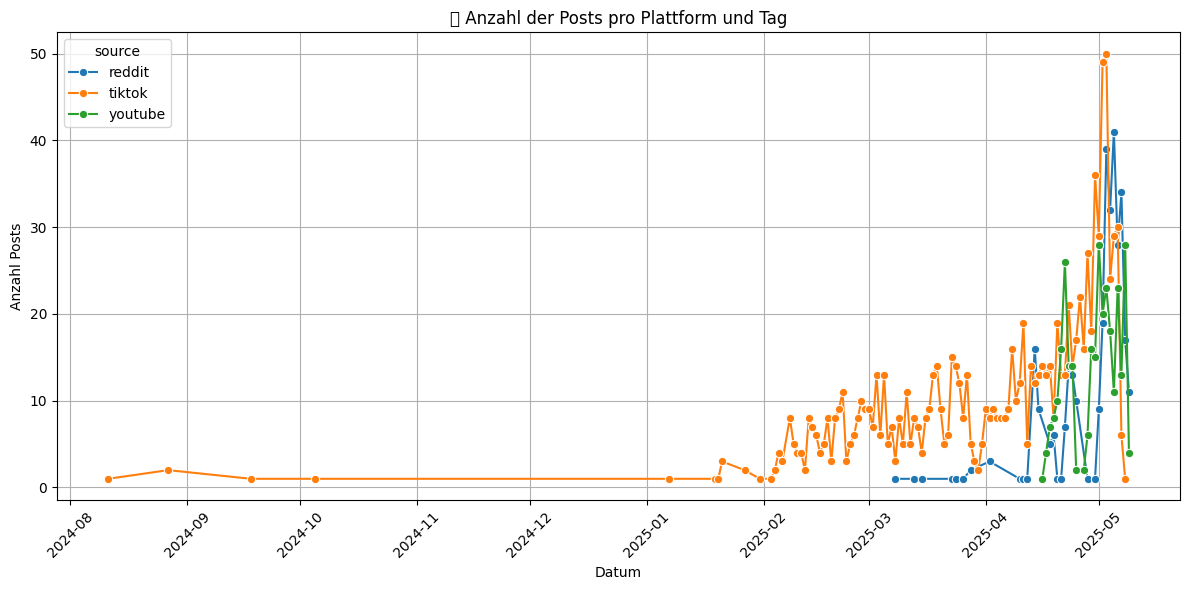

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Beide Spalten sicher in datetime umwandeln
df["published_at"] = pd.to_datetime(df.get("published_at"), errors="coerce", utc=True)
df["timestamp"] = pd.to_datetime(df.get("timestamp"), errors="coerce", utc=True)

# Zeilenweise Auswahl: published_at, falls vorhanden – sonst timestamp
df["datetime"] = df.apply(
    lambda row: row["published_at"] if pd.notna(row["published_at"]) else row["timestamp"],
    axis=1
)

# Nur Datum extrahieren
df["date"] = df["datetime"].dt.date

# Anzahl der Posts pro Plattform pro Tag
posts_per_day = df.groupby(["source", "date"]).size().reset_index(name="post_count")

# 📈 Visualisierung
plt.figure(figsize=(12, 6))
sns.lineplot(data=posts_per_day, x="date", y="post_count", hue="source", marker="o")
plt.title("📊 Anzahl der Posts pro Plattform und Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Posts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Sortiere nach dem kombinierten datetime-Wert (älteste zuerst)
df_sorted = df.sort_values("datetime", ascending=True).reset_index(drop=True)

# Beispiel: die ersten 10 (ältesten) Posts anzeigen
df_sorted[["source", "datetime", "title", "text"]].head(10)
df_sorted

,source,id,title,text,username,likes,comments,shares,plays,timestamp,published_at,url,datetime,date,title_language,title_clean,title_char_count,title_word_count,title_uppercase_count,title_exclamation_count,title_question_count,title_emoji_count,title_mention_count,title_hashtag_count,title_avg_word_length,title_sentiment,title_sentiment_score,text_language,text_clean,text_char_count,text_word_count,text_uppercase_count,text_exclamation_count,text_question_count,text_emoji_count,text_mention_count,text_hashtag_count,text_avg_word_length,text_sentiment,text_sentiment_score,engagement_rate,hour,weekday,year,month,day_period,is_weekend
0,tiktok,7401991210434448670,NaN,#madara #madarauchiha #uchiha #naruto #narutos...,fw.fro1,0.064433,0.023022,0.018745,0.047810,2024-08-11 21:06:34+00:00,NaT,NaN,2024-08-11 21:06:34+00:00,2024-08-11,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neutral,0.0,unknown,#madara #madarauchiha #uchiha #naruto #narutos...,113.0,12.0,0.0,0.0,0.0,12.0,0.0,12.0,8.500000,neutral,0.000000,0.432059,NaN,NaN,NaN,NaN,NaN,False
1,tiktok,7407697938664721697,NaN,Obacht wen ihr anfasst 🤭 #grosserschweizersenn...,teddy_dersennenhund,0.004041,0.001175,0.001151,0.007094,2024-08-27 06:11:40+00:00,NaT,NaN,2024-08-27 06:11:40+00:00,2024-08-27,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neutral,0.0,de,Obacht wen ihr anfasst 🤭 #grosserschweizersenn...,160.0,16.0,1.0,0.0,0.0,12.0,0.0,11.0,9.062500,neutral,0.000000,0.181477,NaN,NaN,NaN,NaN,NaN,False
2,tiktok,7407891899819822368,NaN,Lock in. #motivation #mindset #mentality #davi...,ignition.inspire,0.077320,0.053936,0.051149,0.073103,2024-08-27 18:44:05+00:00,NaT,https://v16-webapp-prime.tiktok.com/video/tos/...,2024-08-27 18:44:05+00:00,2024-08-27,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neutral,0.0,sv,Lock in. #motivation #mindset #mentality #davi...,62.0,7.0,1.0,0.0,0.0,6.0,0.0,5.0,8.000000,neutral,0.000000,0.340067,NaN,NaN,NaN,NaN,NaN,False
3,tiktok,7416071063840247072,NaN,Kenan Yıldız 🇹🇷💫 #UCL #JuventusvsPSV,championsleague,0.028351,0.005904,0.003170,0.037014,2024-09-18 19:43:28+00:00,NaT,https://v16-webapp-prime.tiktok.com/video/tos/...,2024-09-18 19:43:28+00:00,2024-09-18,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neutral,0.0,id,Kenan Yıldız 🇹🇷💫 #UCL #JuventusvsPSV,37.0,5.0,9.0,0.0,0.0,5.0,0.0,2.0,6.400000,neutral,0.000000,0.244374,NaN,NaN,NaN,NaN,NaN,False
4,tiktok,7422394682631654689,NaN,@PRIME 😭🖤,centralcee,0.028351,0.016589,0.003936,0.052745,2024-10-05 20:42:23+00:00,NaT,https://webapp-i18n.tiktok.com/71b1e6ce231f9bd...,2024-10-05 20:42:23+00:00,2024-10-05,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neutral,0.0,unknown,@PRIME 😭🖤,9.0,2.0,5.0,0.0,0.0,3.0,1.0,0.0,4.000000,neutral,0.000000,0.171736,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,reddit,how_sandfall_interactive_artificially_inflated,How Sandfall Interactive artificially inflated...,\nOver the last week and a half you have proba...,NaN,0.000028,0.000283,0.035666,0.040089,NaT,2025-05-09 08:49:13+00:00,https://www.reddit.com/r/expedition33/comments...,2025-05-09 08:49:13+00:00,2025-05-09,en,How Sandfall Interactive artificially inflated...,89.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,8.000000,negative,-0.6,en,Over the last week and a half you have probabl...,1895.0,307.0,36.0,1.0,0.0,30.0,0.0,0.0,5.159609,neutral,0.044812,0.204172,8.0,Friday,2025.0,5.0,morning,False
1687,reddit,one_piece_chapter_1148,One Piece: Chapter 1148,"# Chapter 1148: ""RONJA""\n\n|Source|Status|\n|:...",NaN,0.000021,0.000947,0.035666,0.040089,NaT,2025-05-09 09:26:50+00:00,https://www.reddit.com/r/OnePiece/comments/1ki...,2025-05-09 09:26:50+00:00,2025-05-09,en,One Piece: Chapter 1148,23.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,5.000000,neutral,0.0,en,"# Chapter 1148: ""RONJA""\n\n|Source|Status|\n|:...",537.0,70.0,50.0,0.0,0.0,64.0,0.0,3.0,6.

# Texte zusammenführen

In [51]:
# Kombinieren von Titel und Text (beide bereinigt)
texts = (df["title_clean"].fillna("") + " " + df["text_clean"].fillna("")).astype(str)

# Stopwörter entfernen und tokenisieren

In [52]:
# Englische Stopwörter laden
stop_words = stopwords.words('english')

# Text-Vektorisierung (Bag of Words)
vectorizer = CountVectorizer(
    stop_words=stop_words,
    max_df=0.95,
    min_df=2
)

X = vectorizer.fit_transform(texts)

# Train LDA Model

In [53]:
lda_model = LatentDirichletAllocation(
    n_components=9,         # Anzahl der Themen (anpassbar)
    max_iter=3,
    learning_method='online',
    random_state=42
)

lda_model.fit(X)


LatentDirichletAllocation(learning_method='online', max_iter=3, n_components=9,
                          random_state=42)

# Show topics

In [54]:
# Funktion zum Anzeigen der Themen mit Top-Wörtern
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"🟢 Thema {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


🟢 Thema 1:
brainrot auto redd webp format width preview books pjpg jpg

🟢 Thema 2:
com www https de youtube instagram http twitter facebook amzn

🟢 Thema 3:
com youtube news https trump list nhl oblivion playlist wwe

🟢 Thema 4:
00 11 10 13 game 12 14 16 pf 15

🟢 Thema 5:
husband na got jeff bra couple standard lunch chicken yesterday

🟢 Thema 6:
nba love netflix fortnite fyp better 100 girlfriend final season

🟢 Thema 7:
und die https der auf mit instagram das zu den

🟢 Thema 8:
https instagram video music fyp tiktok official facebook lnk kgs

🟢 Thema 9:
like said time would one get told people even know



In [55]:
# Eigene Stopwords definieren
custom_stopwords = {
    'youtube', 'instagram', 'video', 'link', 'highlight', 'tiktok', 'channel',
    'twitter', 'dazn', 'follow', 'live', '2025', '00', '10', '11', '12', '13', '14', '15', '16', '17'
}

# Gesamtmenge an Stopwords (NLTK + custom)
all_stopwords = set(stopwords.words('english')).union(custom_stopwords)

# Neue Vektorisierung mit erweiterten Stopwords
vectorizer = CountVectorizer(
    stop_words=list(all_stopwords), 
    max_df=0.95,
    min_df=2
)

X = vectorizer.fit_transform(texts)

lda_model = LatentDirichletAllocation(
    n_components=9,         # Anzahl der Themen (anpassbar)
    max_iter=3,
    learning_method='online',
    random_state=42
)

lda_model.fit(X)

# Funktion zum Anzeigen der Themen mit Top-Wörtern
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"🟢 Thema {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


🟢 Thema 1:
assistant production director de van sam magentasport 47 la producer

🟢 Thema 2:
trump tariffs dc china tariff lakers chaos gnarly katseye 캣츠아이

🟢 Thema 3:
oblivion elder scrolls asmr prime chicken tesla remastered iv chair

🟢 Thema 4:
like said would time one get told people even know

🟢 Thema 5:
com https news game pf 20 nba 21 kgs 18

🟢 Thema 6:
und die der https auf mit com den das ist

🟢 Thema 7:
https com www de fyp http facebook viral official ich

🟢 Thema 8:
game team brainrot wwe players season battle high netflix world

🟢 Thema 9:
wife guests jeff webp format width redd extra bra preview



In [56]:
from bertopic import BERTopic

# Texte vorbereiten
texts_list = texts.tolist()

# Modell trainieren
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(texts_list)

# Top-Themen anzeigen
topic_model.get_topic_info()

2025-05-09 16:56:32,037 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 53/53 [00:14<00:00,  3.57it/s]
2025-05-09 16:56:48,587 - BERTopic - Embedding - Completed ✓
2025-05-09 16:56:48,590 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-09 16:56:50,996 - BERTopic - Dimensionality - Completed ✓
2025-05-09 16:56:50,998 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-09 16:56:51,159 - BERTopic - Cluster - Completed ✓
2025-05-09 16:56:51,167 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-09 16:56:51,270 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,378,-1_fyp_the_to_and,"[fyp, the, to, and, is, you, for, of, in, this]",[How Sandfall Interactive artificially inflate...
1,0,247,0_und_die_der_instagram,"[und, die, der, instagram, mit, auf, fr, das, ...",[So soll die Bahn ENDLICH pünktlich werden! Di...
2,1,240,1_and_to_the_my,"[and, to, the, my, it, that, for, he, of, was]",[AITA for not forgiving my parents and sister ...
3,2,141,2_fyp_viral_foryoupage_foryou,"[fyp, viral, foryoupage, foryou, viralvideo, t...","[ 😂😂🙄 #fürdich #fyp, #fyp #foryou #viral #vir..."
4,3,93,3_fyp_les_la_de,"[fyp, les, la, de, en, pas, burrata, kenza, et...","[ « J’AI MÊME LE CRAYON ! » En ce 1er mai, jo..."
5,4,55,4_viewsproblem_capcut_trending_fyp,"[viewsproblem, capcut, trending, fyp, foryoupa...",[ #CapCut UNFREEZ MY ACCOUNT //..(😍😍😍)..//#vi...
6,5,47,5_the_and_of_to,"[the, and, of, to, in, oblivion, is, on, with,...",[The “support strike” and Necros’ comments – w...
7,6,46,6_brainrot_tung_tralalerotralala_italianbrainrot,"[brainrot, tung, tralalerotralala, italianbrai...",[ tung tung tung sahur edit #keşfet #edit #aft...
8,7,39,7_fcbarcelona_football_ucl_lamineyamal,"[fcbarcelona, football, ucl, lamineyamal, rona...",[ 💙❤️ Barcelona vs inter Milan champions leagu...
9,8,39,8_cat_catsoftiktok_funnycat_cats,"[cat, catsoftiktok, funnycat, cats, cute, funn...",[ Crazy cat posture🤣🤣🤣#pets #cat #cats #catsof...


# Save Topics

In [57]:
# Topic-Zuweisungen (Wahrscheinlichkeitsverteilung pro Dokument)
topic_distribution = lda_model.transform(X)

# Das wahrscheinlichste Thema je Text
dominant_topics = topic_distribution.argmax(axis=1)

# Dem Original-DataFrame zuweisen
df_topics = df.loc[texts.index].copy()
df_topics["dominant_topic"] = dominant_topics


# CSV-Datei mit Topics
df_topics.to_csv(RAW_DIR / "social_media_with_topics.csv", index=False)

# Sentiment analyse

In [58]:
# Wir nutzen df_topics, das die Spalte "dominant_topic" enthält
topic_sentiment = df_topics.groupby("dominant_topic")["text_sentiment_score"].agg(["mean", "count", "std"]).reset_index()
topic_sentiment.columns = ["topic", "avg_sentiment", "num_texts", "std_dev"]

# Ergebnisse anzeigen
topic_sentiment


,topic,avg_sentiment,num_texts,std_dev
0,0,0.020659,141,0.110362
1,1,0.076113,56,0.244317
2,2,0.074878,48,0.242186
3,3,0.076809,502,0.230713
4,4,0.052126,75,0.195558
5,5,0.078668,218,0.231731
6,6,0.099497,489,0.236020
7,7,0.020824,97,0.263825
8,8,0.076072,65,0.180339


In [59]:
# Wenn du es noch nicht hast
df_topics = df.copy()
df_topics["topic"] = topics  # topics stammt aus topic_model.transform(texts_list)

# Durchschnittliches Sentiment und Anzahl Dokumente pro Thema
sentiment_per_topic = df_topics.groupby("topic")["text_sentiment_score"].agg(["mean", "count"]).reset_index()
sentiment_per_topic.columns = ["topic", "avg_sentiment", "num_docs"]

# Top 5 Themen mit höchstem durchschnittlichem Sentiment (ohne Outlier -1)
top_positive_topics = sentiment_per_topic[sentiment_per_topic["topic"] != -1].sort_values("avg_sentiment", ascending=False).head(5)
top_positive_topics

for topic_id in top_positive_topics["topic"]:
    print(f"🟢 Thema {topic_id}")
    print("Top-Wörter:", ", ".join([word for word, _ in topic_model.get_topic(topic_id)[:10]]))
    print()

🟢 Thema 15
Top-Wörter: league, dazn, die, highlights, der, uefa, auf, und, champions, europa

🟢 Thema 11
Top-Wörter: hair, hairstyle, fyp, flowers, sunset, foryoupage, cover, curlygirl, parenting, coldplay

🟢 Thema 10
Top-Wörter: capcut, capcuttrend, capcutedit, template, capcutvelocity, fyp, trend, foryou, capcutmotivacional, foryoupa

🟢 Thema 18
Top-Wörter: prank, funny, fyp, pranks, fart, spray, iphone, ranking, best, apple

🟢 Thema 8
Top-Wörter: cat, catsoftiktok, funnycat, cats, cute, funny, funnyanimals, funnyvideos, catlover, funnypets



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from pathlib import Path

# Daten laden

df = pd.read_csv(RAW_DIR / "social_media_data.csv")

# Datum/Zeit vorbereiten
df["published_at"] = pd.to_datetime(df.get("published_at"), errors="coerce", utc=True)
df["timestamp"] = pd.to_datetime(df.get("timestamp"), errors="coerce", utc=True)
df["datetime"] = df.apply(
    lambda row: row["published_at"] if pd.notna(row["published_at"]) else row["timestamp"],
    axis=1
)

# Leere Texte auffüllen und kombinieren
texts = (df["title_clean"].fillna("") + " " + df["text_clean"].fillna("")).astype(str)

# Text-Vektorisierung (Bag of Words) mit eingebauten englischen Stopwords
vectorizer = CountVectorizer(
    stop_words="english",
    max_df=0.95,
    min_df=2
)
X = vectorizer.fit_transform(texts)

# LDA-Modell trainieren
lda_model = LatentDirichletAllocation(
    n_components=9,
    max_iter=3,
    learning_method='online',
    random_state=42
)
lda_model.fit(X)

# Dominantes Topic pro Dokument bestimmen
topic_distributions = lda_model.transform(X)
dominant_topics = np.argmax(topic_distributions, axis=1)
df["dominant_topic"] = dominant_topics

# Wichtigstes (häufigstes) Topic bestimmen
most_important_topic = df["dominant_topic"].value_counts().idxmax()

# Zeitblöcke definieren (vier 6-Stunden-Blöcke pro Tag)
df["time_block"] = df["datetime"].dt.hour // 6

# Nur das wichtigste Topic filtern
df_topic = df[df["dominant_topic"] == most_important_topic].copy()

# Gruppierung nach Datum + Zeitblock
topic_time_distribution = (
    df_topic.groupby([df_topic["datetime"].dt.date, "time_block"])
    .size()
    .reset_index(name="count")
    .rename(columns={"datetime": "date"})
)

# Visualisierung
plt.figure(figsize=(14, 6))
for block in range(4):
    subset = topic_time_distribution[topic_time_distribution["time_block"] == block]
    plt.plot(subset["date"], subset["count"], marker="o", label=f"Block {block} ({block*6}:00–{(block+1)*6}:00)")

plt.title(f"📈 Verlauf des wichtigsten Themas (Topic {most_important_topic}) über den Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Posts mit Thema")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Tageszeit-Block")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data\\processed\\social_media_data.csv'